In [16]:
import sys
import os

# Add the src directory to the Python path
src_path = os.path.join(os.getcwd(), 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from src.optimizers import *
np.random.seed(0)


#### Data pre-processing for MONK Datasets 

In [18]:
########################################################
### Don't forget to change the path to the data file ###
########################################################

df = pd.read_csv("../ML_project/data/Monk_1/monks-1.train", names=[0,1,2,3,4,5,6,"index"], delimiter= " ")
df = pd.read_csv("../ML_project/data/Monk_1/monks-1.train",
                 names=[0, 1, 2, 3, 4, 5, 6, "index"], delimiter=" ")
df.set_index("index", inplace=True)
y = df.iloc[:, 0]  # First column as target
X = df.iloc[:, 1:]  # All other columns as features
for i in range(1, X.shape[1]):
    X.iloc[:, i] = (X.iloc[:, i] - np.mean(X.iloc[:, i])) / \
        np.std(X.iloc[:, i])
X.head()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_37460\714164554.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'index
data_5     -1.358371
data_6     -1.358371
data_19    -1.358371
data_22    -1.358371
data_27    -1.358371
              ...   
data_416    1.118658
data_426    1.118658
data_428    1.118658
data_430    1.118658
data_432    1.118658
Name: 2, Length: 124, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, i] = (X.iloc[:, i] - np.mean(X.iloc[:, i])) / \
C:\Users\KIIT\AppData\Local\Temp\ipykernel_37460\714164554.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'index
data_5     -0.952729
data_6     -0.952729
data_19    -0.952729
data_22    -0.952729
data_27     1.049617
              ...   
data_416    1.049617
data_426    1.049617
data_428    1.049617
data_430    1.0

1         2         3         4         5         6
index                                                       
data_5   1 -1.358371 -0.952729 -1.217616  0.394684 -1.101946
data_6   1 -1.358371 -0.952729 -1.217616  0.394684  0.907485
data_19  1 -1.358371 -0.952729  1.198134 -0.495149 -1.101946
data_22  1 -1.358371 -0.952729  1.198134  0.394684  0.907485
data_27  1 -1.358371  1.049617 -1.217616 -0.495149 -1.101946

In [5]:
########################################################
### Don't forget to change the path to the data file ###
########################################################

test_data = pd.read_csv("../ML_project/data/Monk_1/monks-1.test",
names=[0, 1, 2, 3, 4, 5, 6, "index"], delimiter=" ")
test_data.set_index("index", inplace=True)
# test_data.head()
y_test = test_data.iloc[:, 0]
X_test = test_data.iloc[:, 1:]
for i in range(1, X_test.shape[1]):
    X_test.iloc[:, i] = (X_test.iloc[:, i] - np.mean(X_test.iloc[:, i])) / np.std(X_test.iloc[:, i])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_37460\787689796.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'index
data_1     -1.224745
data_2     -1.224745
data_3     -1.224745
data_4     -1.224745
data_5     -1.224745
              ...   
data_428    1.224745
data_429    1.224745
data_430    1.224745
data_431    1.224745
data_432    1.224745
Name: 2, Length: 432, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.iloc[:, i] = (X_test.iloc[:, i] - np.mean(X_test.iloc[:, i])) / np.std(X_test.iloc[:, i])
C:\Users\KIIT\AppData\Local\Temp\ipykernel_37460\787689796.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'index
data_1     -1.0
data_2     -1.0
data_3     -1.0
data_4     -1.0
data_5     -1.0
           ... 
data_428    1.0
data_429    1.0
data_430    1.0
data_431    1.0
data_

#### Data pre-processing for CUP DATASET 

In [20]:
filepath = "../ML_project/data/cup/ML-CUP24-TR.csv"
df = pd.read_csv(filepath, skiprows=7, header=None)
df.columns = ["ID"] + [f'input_{i}' for i in range(12)] + ['target_x', 'target_y', 'target_z']
df = df.drop('ID', axis=1)
X = df.iloc[:, :12]  # First column as target
y = df.iloc[:, -3:]  # All other columns as features
for i in range(1, X.shape[1]):
    X.iloc[:, i] = (X.iloc[:, i] - np.mean(X.iloc[:, i])) / \
        np.std(X.iloc[:, i])
# X.head()

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Validation Features Shape:", X_val.shape)
print("Training Target Shape:", y_train.shape)
print("Validation Target Shape:", y_val.shape)

Training Features Shape: (200, 12)
Validation Features Shape: (50, 12)
Training Target Shape: (200, 3)
Validation Target Shape: (50, 3)


In [22]:
def create_batches(X, y, batch_size):
    """Create mini-batches from the data"""
    # Convert to numpy array if input is pandas DataFrame/Series
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
    
    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start_idx in range(0, n_samples, batch_size):
        end_idx = min(start_idx + batch_size, n_samples)
        batch_indices = indices[start_idx:end_idx]
        
        yield X[batch_indices], y.iloc[batch_indices] # ****changed something****

In [23]:
import matplotlib.pyplot as plt

def plot_accuracies(train_vals, val_vals, label1="train_accuracies", label2="val_accuracies", title="Accuracy Over Epochs"):
    """
    Plot training and validation accuracies over epochs.

    Parameters:
    - train_accuracies (list or array): Accuracy values for training data over epochs.
    - val_accuracies (list or array): Accuracy values for validation data over epochs.
    - title (str): Title of the plot. Default is "Accuracy Over Epochs".
    """
    plt.figure(figsize=(8, 6))
    plt.plot(train_vals, label=label1, color="blue", linewidth=2)
    plt.plot(val_vals, label=label2, linestyle="--", color="orange", linewidth=2)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()


Training Fold 1/5...


c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inp

Fold 1: Train Loss: 1.532, Train Accuracy: 0.963, Val Loss: 1.511, Val Accuracy: 0.929

Training Fold 2/5...


c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inp

Fold 2: Train Loss: 1.488, Train Accuracy: 0.953, Val Loss: 1.583, Val Accuracy: 0.942

Training Fold 3/5...


c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inp

Fold 3: Train Loss: 1.437, Train Accuracy: 0.952, Val Loss: 1.910, Val Accuracy: 0.958

Training Fold 4/5...


c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inp

Fold 4: Train Loss: 1.596, Train Accuracy: 0.963, Val Loss: 1.278, Val Accuracy: 0.919

Training Fold 5/5...


c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inp

Fold 5: Train Loss: 1.582, Train Accuracy: 0.967, Val Loss: 1.422, Val Accuracy: 0.930

Average Performance over 5 Folds:
Train Loss: 1.527, Train Accuracy: 0.960
Validation Loss: 1.541, Validation Accuracy: 0.936


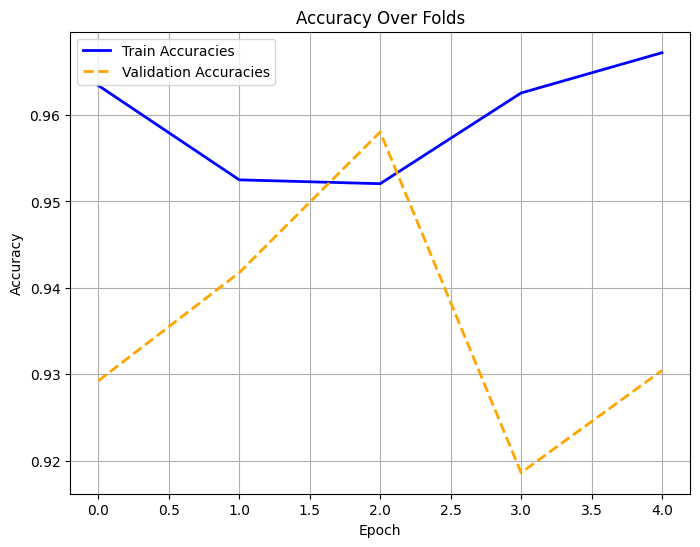

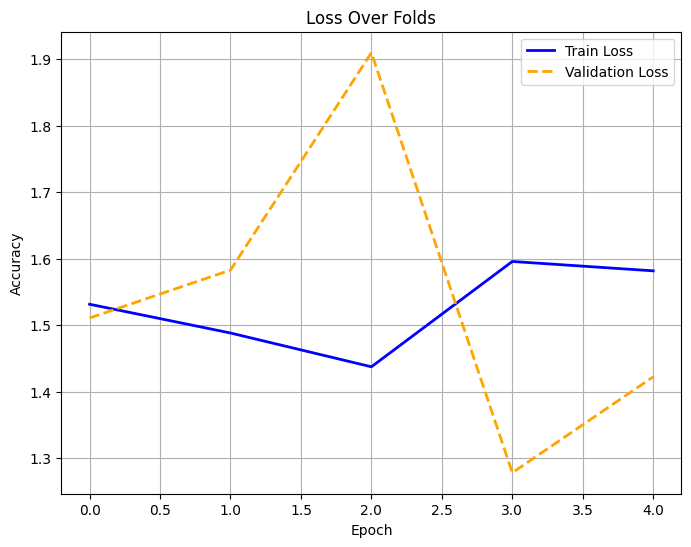

In [28]:
class Layer_Dense:
    
    def __init__(self, n_inputs, n_neurons,  l1=0.0, l2=0.0):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        self.l1 = l1
        self.l2 = l2
        
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
   
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues) 
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        
        # L1 regularization
        if self.l1 > 0:
            dl1 = np.ones_like(self.weights)
            dl1[self.weights < 0] = -1
            self.dweights += self.l1 * dl1
            
        # L2 regularization
        if self.l2 > 0:
            self.dweights += 2 * self.l2 * self.weights
            
        # Gradient on values 
        self.dinputs = np.dot(dvalues, self.weights.T)  
               
    def get_regularization_loss(self):
        """
        Calculate regularization loss for the layer.
        
        Returns:
        - regularization_loss: Combined L1 and L2 regularization loss
        """
        regularization_loss = 0
        
        if self.l1 > 0:
            regularization_loss += self.l1 * np.sum(np.abs(self.weights))
            
        if self.l2 > 0:
            regularization_loss += self.l2 * np.sum(self.weights * self.weights)
            
        return regularization_loss
    
class Dropout:
    def __init__(self, rate):
        """
        Initialize a dropout layer.
        
        Parameters:
        - rate: Dropout rate (fraction of inputs to drop)
        """
        self.rate = 1 - rate  # Store keep rate instead of drop rate
        self.mask = None
        
    def forward(self, inputs, training=True):
        """
        Perform the forward pass with dropout.
        
        Parameters:
        - inputs: Input data
        - training: Boolean indicating training mode
        """
        self.inputs = inputs
        
        if training:
            self.mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate
            self.output = inputs * self.mask
        else:
            self.output = inputs
            
    def backward(self, dvalues):
        """
        Perform the backward pass through dropout.
        
        Parameters:
        - dvalues: Gradient of the loss with respect to the output
        """
        self.dinputs = dvalues * self.mask
        
        
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        # Since we need to modify the orginial variable,
        # let's make a copy of the values first
        self.dinputs = dvalues.copy()
        
        # zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0

class Activation_Leaky_ReLU:
    def forward(self, inputs, alpha=0.01):
        self.inputs = inputs
        self.output = np.where(inputs > 0, inputs, alpha * inputs)

    def backward(self, dvalues, alpha=0.01):  # f′(x) = {1, α : if  x > 0 ; if x ≤ 0}
        self.dinputs = dvalues.copy()
        self.dinputs = np.where(self.inputs > 0, 1, alpha)
        self.dinputs *= dvalues

class Activation_Sigmoid:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = 1/(1 + np.exp(-inputs))

    def backward(self, dvalues):  # f′(x) = σ(x)⋅(1−σ(x))
        self.dinputs = dvalues.copy()
        self.dinputs = self.output * (1 - self.output)
        self.dinputs *= dvalues


class Activation_Tanh:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.tanh(inputs)

    def backward(self, dvalues):  # f′(x) = 1−tanh**2(x)
        self.dinputs = dvalues.copy()
        self.dinputs = 1 - (self.output)**2
        self.dinputs *= dvalues

class Activation_Softmax:
    def forward(self, inputs):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        
        for index, (single_output, single_dvalues) in \
                enumerate(zip(self.output, dvalues)):
            single_output = single_output.reshape(-1, 1)
            
            jacobian_matrix = np.diagflat(single_output) - \
                                np.dot(single_output, single_output.T)

            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        if len(y_true.shape) == 1:
            correct_confidence = y_pred_clipped[range(samples), y_true]

        elif len(y_true.shape) == 2:
            correct_confidence = np.sum(y_pred_clipped * y_true, axis=1) 

        negative_log_likelihoods = np.log(correct_confidence)
        return negative_log_likelihoods

    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


class Activation_Softmax_Loss_CategoricalCrossentropy():

    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()


    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)

        # Set the output
        self.output = self.activation.output

        return self.loss.calculate(self.output, y_true)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)

        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        self.dinputs = dvalues.copy()

        self.dinputs[range(samples), y_true] -= 1

        self.dinputs = self.dinputs / samples

class MSE:
    def __init__(self):
        self.dinputs = 0
        self.loss = 0
        self.output = 0
        
        
    def forward(self, y_pred, y_true):
        self.output = np.mean((y_pred - y_true)**2)
        return self.output
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        outputs = len(dvalues[0])
        
        self.dinputs = -2 * (y_true - dvalues) / outputs
        self.dinputs = self.dinputs / samples
        
        
# X, y = create_data(100, 3)


# *************CROSS VALIDATION**********
# KFold Cross Validation Setup
n_splits = 5  # Number of folds
n_samples = X.shape[0]

#create an array of indices and shuffle them
indices = np.random.RandomState(seed=42).permutation(n_samples)

# Calculate fold sizes (handles remainder for uneven splits)
fold_sizes = (n_samples // n_splits) * np.ones(n_splits, dtype=int)
fold_sizes[:n_samples % n_splits] += 1


# For storing the results across all folds
fold_train_losses = []
fold_train_accuracies = []
fold_val_losses = []
fold_val_accuracies = []

# Cross-validation loop
# for fold, (train_index, val_index) in enumerate(kf.split(X)):
#     print(train_index, val_index)
#     print("\n")

current = 0

for fold in range(n_splits):
    print(f"\nTraining Fold {fold + 1}/{n_splits}...")
    
    start = current
    end = start + fold_sizes[fold]
    val_index = indices[start:end]
    train_index = np.concatenate([indices[:start], indices[end:]])
    
    current = end  # Update position for next fold

    # Split data into train and validation based on current fold
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]


    # Initialize the neural network layers and optimizer for this fold
    dense1 = Layer_Dense(12, 10)
    activation4 = Activation_Leaky_ReLU()
    dropout = Dropout(rate=0.3)
    dense2 = Layer_Dense(10, 3)
    loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
    optimizer = Optimizer_Adam(learning_rate=0.003)

    n_epochs = 500
    batch_size = 32

    # Train and validate for the current fold
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(n_epochs):
        batch_losses = []
        batch_accuracies = []

        # Mini-batch training
        for X_batch, y_batch in create_batches(X_train_fold, y_train_fold, batch_size):
            # Forward pass
            dense1.forward(X_batch)
            activation4.forward(dense1.output)
            dense2.forward(activation4.output)
            loss = loss_activation.forward(dense2.output, y_batch)

            # Calculate accuracy for this batch
            predictions = np.argmax(loss_activation.output, axis=1)
            y_true = np.argmax(y_batch, axis=1) if len(
                y_batch.shape) == 2 else y_batch
            accuracy = np.mean(predictions == y_true)

            # Backward pass
            loss_activation.backward(loss_activation.output, y_batch)
            dense2.backward(loss_activation.dinputs)
            activation4.backward(dense2.dinputs)
            dense1.backward(activation4.dinputs)

            # Update weights and biases
            optimizer.pre_update_params()
            optimizer.update_params(dense1)
            optimizer.update_params(dense2)
            optimizer.post_update_params()

            batch_losses.append(loss)
            batch_accuracies.append(accuracy)

        # Epoch-level training metrics
        epoch_loss = np.mean(batch_losses)
        epoch_accuracy = np.mean(batch_accuracies)
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)

        # Validation pass (entire validation dataset)
        dense1.forward(X_val_fold)
        activation4.forward(dense1.output)
        dense2.forward(activation4.output)
        val_loss = loss_activation.forward(dense2.output, y_val_fold)

        # Calculate validation accuracy
        val_predictions = np.argmax(loss_activation.output, axis=1)
        y_val_true = np.argmax(y_val_fold, axis=1) if len(
            y_val_fold.shape) == 2 else y_val_fold
        val_accuracy = np.mean(val_predictions == y_val_true)

        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

    # Store fold results
    fold_train_losses.append(np.mean(train_losses))
    fold_train_accuracies.append(np.mean(train_accuracies))
    fold_val_losses.append(np.mean(val_losses))
    fold_val_accuracies.append(np.mean(val_accuracies))

    # Print fold results
    print(f"Fold {fold + 1}: "
          f"Train Loss: {np.mean(train_losses):.3f}, Train Accuracy: {np.mean(train_accuracies):.3f}, "
          f"Val Loss: {np.mean(val_losses):.3f}, Val Accuracy: {np.mean(val_accuracies):.3f}")

# After all folds, calculate the overall average performance
avg_train_loss = np.mean(fold_train_losses)
avg_train_accuracy = np.mean(fold_train_accuracies)
avg_val_loss = np.mean(fold_val_losses)
avg_val_accuracy = np.mean(fold_val_accuracies)

# Print overall average performance
print(f"\nAverage Performance over {n_splits} Folds:")
print(
    f"Train Loss: {avg_train_loss:.3f}, Train Accuracy: {avg_train_accuracy:.3f}")
print(
    f"Validation Loss: {avg_val_loss:.3f}, Validation Accuracy: {avg_val_accuracy:.3f}")

# Plot Results
plot_accuracies(fold_train_accuracies, fold_val_accuracies, label1="Train Accuracies",
                label2="Validation Accuracies", title="Accuracy Over Folds")
plot_accuracies(fold_train_losses, fold_val_losses, label1="Train Loss",
                label2="Validation Loss", title="Loss Over Folds")

In [26]:
test_accuracy = []
batch_size = 32

# Forward pass
dense1.forward(X_test)
activation4.forward(dense1.output)
dense2.forward(activation4.output)
loss = loss_activation.forward(dense2.output, y_test)

# Calculate accuracy for this batch
predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
    y_true = np.argmax(y_batch, axis=1)
else:
    y_true = y_test
accuracy = np.mean(predictions == y_true)
test_accuracy.append(accuracy)

ValueError: shapes (432,6) and (12,10) not aligned: 6 (dim 1) != 12 (dim 0)

In [14]:
test_accuracy

[]